In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import modgp
import GPflow

/home/paad/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def logistic(x):
    return 1./(1+ np.exp(-x))

In [3]:
X = np.linspace(0, 1, 2000).reshape(-1, 1)

k1 = GPflow.kernels.Matern52(input_dim=1, lengthscales=1.)
k2 = GPflow.kernels.Matern52(input_dim=1, lengthscales=0.1, variance=10.)
frec = 20
k_i = GPflow.kernels.Cosine(input_dim = 1, variance=1.0,  lengthscales=1./(2*np.pi*frec))
k_j = GPflow.kernels.Cosine(input_dim = 1, variance=0.5,  lengthscales=1./(2*2*np.pi*frec))
k_l = GPflow.kernels.Cosine(input_dim = 1, variance=0.25, lengthscales=1./(3*2*np.pi*frec))
k3 = k1*(k_i + k_j + k_l)

In [5]:
K2 = k2.compute_K_symm(X)
K3 = k3.compute_K_symm(X)

In [35]:
noise_var = 0.001
np.random.seed(1)
f = np.random.multivariate_normal(np.zeros(X.shape[0]), K3).reshape(-1, 1)
g = np.random.multivariate_normal(np.zeros(X.shape[0]), K2).reshape(-1, 1)
mean = f * logistic(g)
y = mean + np.random.randn(*mean.shape) * np.sqrt(noise_var)

/home/paad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


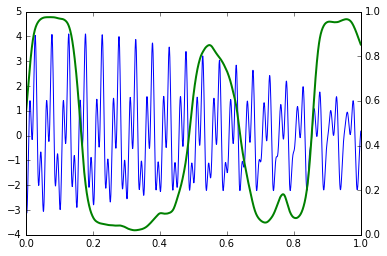

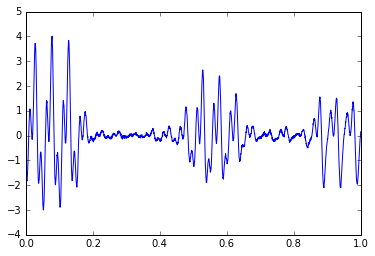

In [36]:
plt.plot(X, f, 'b')
plt.twinx()
plt.plot(X, logistic(g), 'g', lw=2)

plt.figure()
plt.plot(X, y, 'b')

In [8]:
m = modgp.ModGP(X, y, k3, k2, X[::8].copy())

In [9]:
m.kern1.fixed = True
m.kern2.fixed = True
m.likelihood.noise_var = noise_var
m.likelihood.noise_var.fixed = True

In [28]:
m.optimize(disp=1, maxiter = 2000)

      fun: -3824.7623792510294
 hess_inv: <125500x125500 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04182647, -0.        , -0.        , ..., -0.75459183,
       -0.49016203, -0.39713784])
  message: 'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 2057
      nit: 2001
   status: 1
  success: False
        x: array([ 0.02072899,  0.        ,  0.        , ...,  1.75304555,
        1.6647201 ,  1.583692  ])

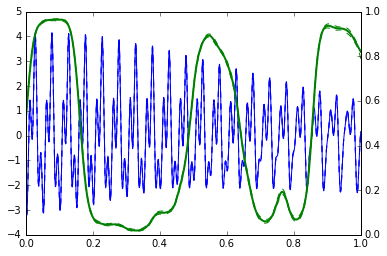

In [30]:
mu, var = m.predict_f(X)
plt.figure()
plt.plot(X, mu, 'b')
plt.plot(X, mu + 2*np.sqrt(var), 'b--')
plt.plot(X, mu - 2*np.sqrt(var), 'b--')
plt.twinx()
mu, var = m.predict_g(X)
plt.plot(X, logistic(mu), 'g', lw=2)
plt.plot(X, logistic(mu + 2*np.sqrt(var)), 'g--')
plt.plot(X, logistic(mu - 2*np.sqrt(var)), 'g--')